# PCA Components
# ----------------------------------------------------

In [174]:
import pandas as pd
import numpy as np

import plotly_express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


In [3]:
sns.set(style='ticks')

### Config

In [4]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
OHCO = 'artist'

In [5]:
colors = "YlGnBu" 

## Import Tables

In [10]:
LIB = pd.read_csv('lib.csv').set_index('artist')
TFIDF = pd.read_csv('tfidf_l2.csv').set_index('artist')

In [11]:
TFIDF

,taken,drama,goodbye,understand,wants,going,tired,rest,tall,glass,...,compasses,grind,possible,thing,mind,good,night,want,is,love
artist,,,,,,,,,,,,,,,,,,,,,
ADELE,0.002641,0.000000,0.007923,0.015847,0.023770,0.000000,0.018488,0.002641,0.034335,0.000000,...,0.000000,0.000000,0.000000,0.009431,0.015718,0.005763,0.006811,0.032483,0.056059,0.0
AMY WINEHOUSE,0.004011,0.008023,0.036103,0.044126,0.000000,0.016046,0.024069,0.004011,0.012034,0.004011,...,0.000000,0.000000,0.000000,0.006366,0.008753,0.009549,0.015915,0.011936,0.064456,0.0
ARIANA GRANDE,0.000000,0.002529,0.000000,0.000000,0.000000,0.002529,0.007588,0.005059,0.000000,0.002529,...,0.000000,0.000000,0.000000,0.005519,0.012042,0.016057,0.009032,0.032113,0.042149,0.0
BEYONCE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.019555,0.000000,0.000000,0.019555,0.000000,0.000000,0.0
CYNDI LAUPER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085762,0.064322,0.021441,0.0
DOLLY PARTON,0.000000,0.000000,0.000000,0.000000,0.128549,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.025500,0.025500,0.000000,0.000000,0.076500,0.0
DUA LIPA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021621,0.021621,0.043241,0.021621,0.043241,0.021621,0.0
LAURYN HILL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.017200,0.034399,0.017200,0.000000,0.017200,0.017200,0.0
PINK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012578,...,0.000000,0.000000,0.000000,0.009980,0.004990,0.004990,0.009980,0.007485,0.000000,0.0


In [106]:
VOCAB = pd.read_csv('vocab.csv').set_index('term_str')
VSHORT = VOCAB[VOCAB.max_pos_group.isin(['NN', 'VB', 'JJ']) & ~VOCAB.max_pos.isin(['NNP'])].sort_values('dfidf', ascending=False).head(5000)


# ----------------------------------------------------

## Run PCA


In [12]:
pca_engine = PCA(n_components=10)

In [16]:
DCM = pd.DataFrame(pca_engine.fit_transform(TFIDF.fillna(0)), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['nationality', 'genre', 'decade_of_prominence', 'birth_year',
       'instruments', 'character_count']], on='artist')

In [14]:
LIB.columns

Index(['nationality', 'genre', 'decade_of_prominence', 'birth_year',
       'instruments', 'character_count'],
      dtype='object')

In [150]:
def vis_pcs(M, a, b, label='artist', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color = 'nationality', hover_name = 'genre', 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

In [151]:
def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VSHORT)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=800)


# ----------------------------------------------------
# DCM Table
# ----------------------------------------------------

In [152]:
DCM

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,nationality,genre,decade_of_prominence,birth_year,instruments,character_count
artist,,,,,,,,,,,,,,,,
ADELE,-0.411666,0.024876,0.026177,0.035403,-0.118246,0.018967,0.000057,0.598100,-0.161493,-0.149728,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']",76812
AMY WINEHOUSE,-0.395252,0.003733,0.020189,0.033223,-0.073326,-0.032593,0.587867,-0.252738,-0.148209,-0.107941,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']",52459
ARIANA GRANDE,-0.413339,0.038730,0.011196,0.030602,-0.265136,0.009214,-0.436826,-0.312524,-0.075903,-0.279905,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']",89008
BEYONCE,0.483127,0.357619,0.351584,0.417329,0.014180,-0.570263,-0.015143,0.007674,0.020700,0.010765,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']",146783
CYNDI LAUPER,0.437684,-0.116561,0.623040,-0.015194,-0.011278,0.608264,0.011554,-0.012009,0.019122,-0.000617,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669
DOLLY PARTON,0.382693,-0.575440,0.003706,-0.541376,-0.179713,-0.393770,-0.003349,0.017000,0.010498,0.005983,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805
DUA LIPA,0.440951,-0.345984,-0.569111,0.555598,-0.069851,0.193194,0.005728,0.003703,0.013437,0.004373,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067
LAURYN HILL,0.429853,0.645888,-0.390964,-0.428894,-0.134886,0.175848,0.030910,0.007233,0.025055,0.012854,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']",129809
PINK,-0.052612,-0.033088,-0.087961,-0.116261,0.852873,-0.014141,-0.112306,-0.049137,-0.185609,0.007083,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']",93059


## PC 0 and 1


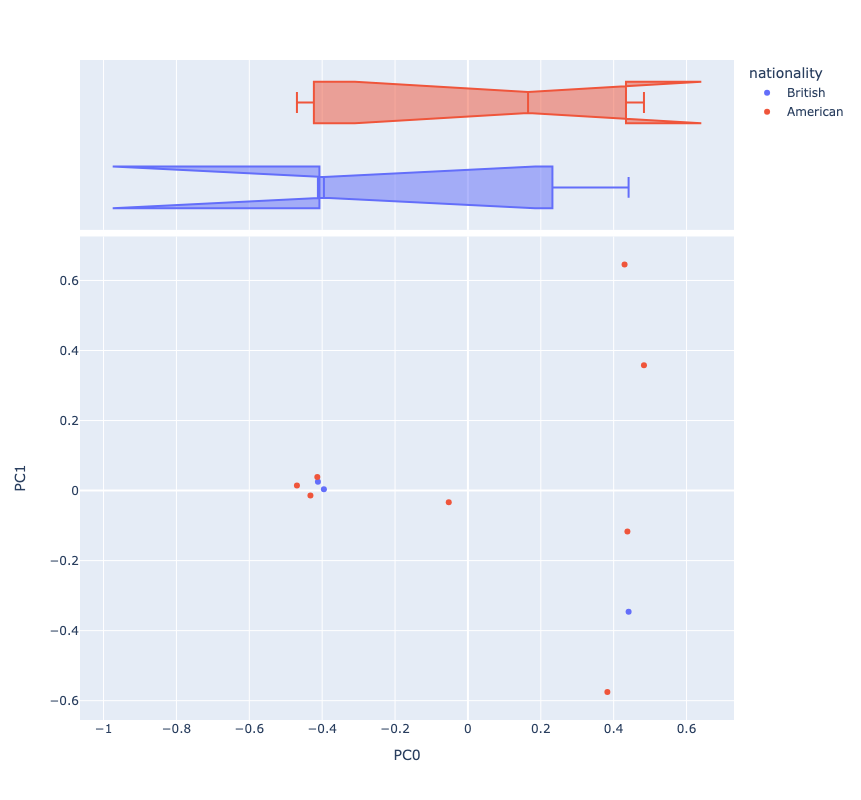

In [153]:
vis_pcs(DCM, 0, 1)

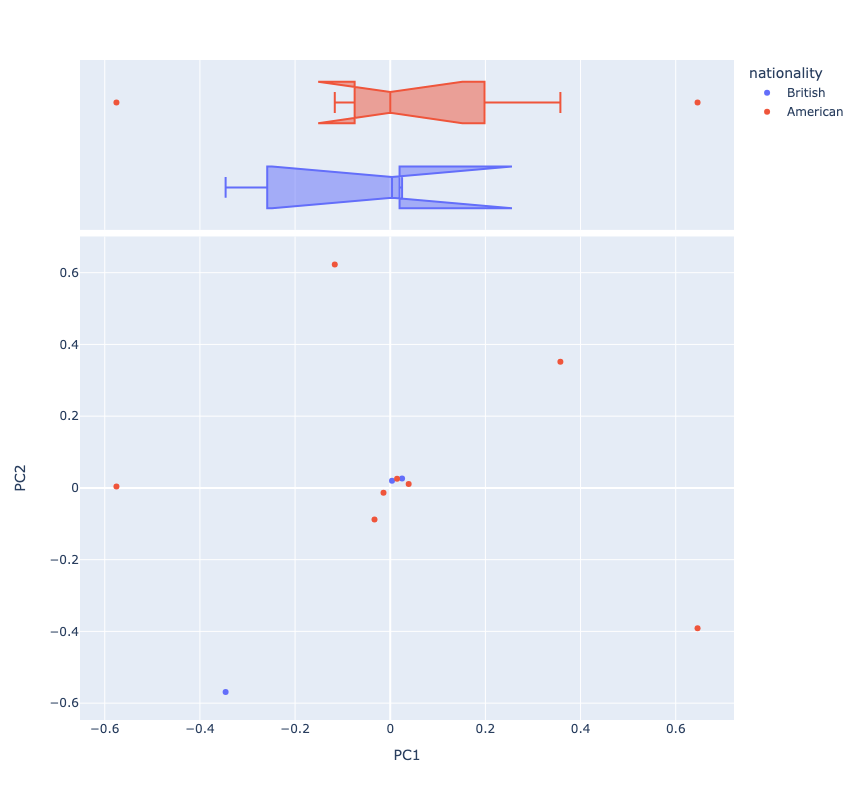

In [154]:
vis_pcs(DCM, 1, 2)


# -------------------------------------------------------------
## Top 5 positive terms for first component
# -------------------------------------------------------------

In [155]:
DCM_PC0 = DCM.sort_values(by = 'PC0', ascending= False)
DCM_PC0.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,nationality,genre,decade_of_prominence,birth_year,instruments,character_count
artist,,,,,,,,,,,,,,,,
BEYONCE,0.483127,0.357619,0.351584,0.417329,0.014180,-0.570263,-0.015143,0.007674,0.020700,0.010765,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']",146783
DUA LIPA,0.440951,-0.345984,-0.569111,0.555598,-0.069851,0.193194,0.005728,0.003703,0.013437,0.004373,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067
CYNDI LAUPER,0.437684,-0.116561,0.623040,-0.015194,-0.011278,0.608264,0.011554,-0.012009,0.019122,-0.000617,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669
LAURYN HILL,0.429853,0.645888,-0.390964,-0.428894,-0.134886,0.175848,0.030910,0.007233,0.025055,0.012854,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']",129809
DOLLY PARTON,0.382693,-0.575440,0.003706,-0.541376,-0.179713,-0.393770,-0.003349,0.017000,0.010498,0.005983,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805


# -----------------------------------------------------------
## Top 5 negative terms for second component
# -----------------------------------------------------------

In [100]:
DCM_PC1 = DCM.sort_values(by = 'PC1', ascending= True)
DCM_PC1.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,nationality,genre,decade_of_prominence,birth_year,instruments,character_count
artist,,,,,,,,,,,,,,,,
DOLLY PARTON,0.382693,-0.575440,0.003706,-0.541376,-0.179713,-0.393770,-0.003349,0.017000,0.010498,0.005983,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805
DUA LIPA,0.440951,-0.345984,-0.569111,0.555598,-0.069851,0.193194,0.005728,0.003703,0.013437,0.004373,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067
CYNDI LAUPER,0.437684,-0.116561,0.623040,-0.015194,-0.011278,0.608264,0.011554,-0.012009,0.019122,-0.000617,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669
PINK,-0.052612,-0.033088,-0.087961,-0.116261,0.852873,-0.014141,-0.112306,-0.049137,-0.185609,0.007083,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']",93059
TAYLOR SWIFT,-0.432175,-0.014166,-0.013736,-0.008320,0.172651,-0.009057,0.040464,0.038660,0.568678,-0.027288,American,"Country, Pop",2000s,1989,"['Vocals', 'Guitar', 'Piano']",96348


# -----------------------------------------------------------

In [83]:
csv_file = 'dcm.csv'
DCM.to_csv(csv_file)

# -----------------------------------------------------------

# PCA Loadings
# ----------------------------------------------------

In [101]:
LOADINGS = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
LOADINGS.columns = ["PC{}".format(i) for i in LOADINGS.columns]
LOADINGS.index = TFIDF.columns
LOADINGS.index.name = 'term_str'

In [102]:
top_terms_sk= {}
data = []
for i in range(10):
    for j in [0, 1]:
        data.append((i, j, ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())))


In [103]:
comp_strs = pd.DataFrame(data)
comp_strs.columns =  ['pc', 'pole', 'gloss']
comp_strs = comp_strs.set_index(['pc', 'pole'])

In [104]:
comp_strs.unstack()

gloss  \
pole                                                  0   
pc                                                        
0     exfactor jolene training superstar freedom spi...   
1     exfactor freedom superstar mix motives consume...   
2     jolene fearless hole drove changes bop heartac...   
3     training idgaf illusion julian swan hallucinat...   
4     was stairs wind remember prayer rare hair maim...   
5     fearless heartaches bop drove changes early ho...   
6     valerie man hugging monkey s ay box dry walks ...   
7     rumour highs lows let ai ve lights do crumbles eh   
8     shake ohoh gorgeous hits call getaway s hate l...   
9     baby whoa higher clap yall belong loves bring ...   

                                                         
pole                                                  1  
pc                                                       
0                      s m do baby be know re ve was go  
1     backwoods eagle garden training circle grass d...  
2     training exfactor genesis illusion julian swan...  
3     exfactor eagle backwoods freedom circle grass ...  
4            baby ayy do wan m be know ai exfactor feel  
5     cozy countdown irreplaceable sandcastles cuff ...  
6     ayy baby m sweetener pickin focus bum somethin...  
7     ayy valerie wan sweetener pickin focus monkey ...  
8     rumour valerie stairs prayer ai highs lows wan...  
9     ayy rumour ai sweetener pickin focus somethin ...

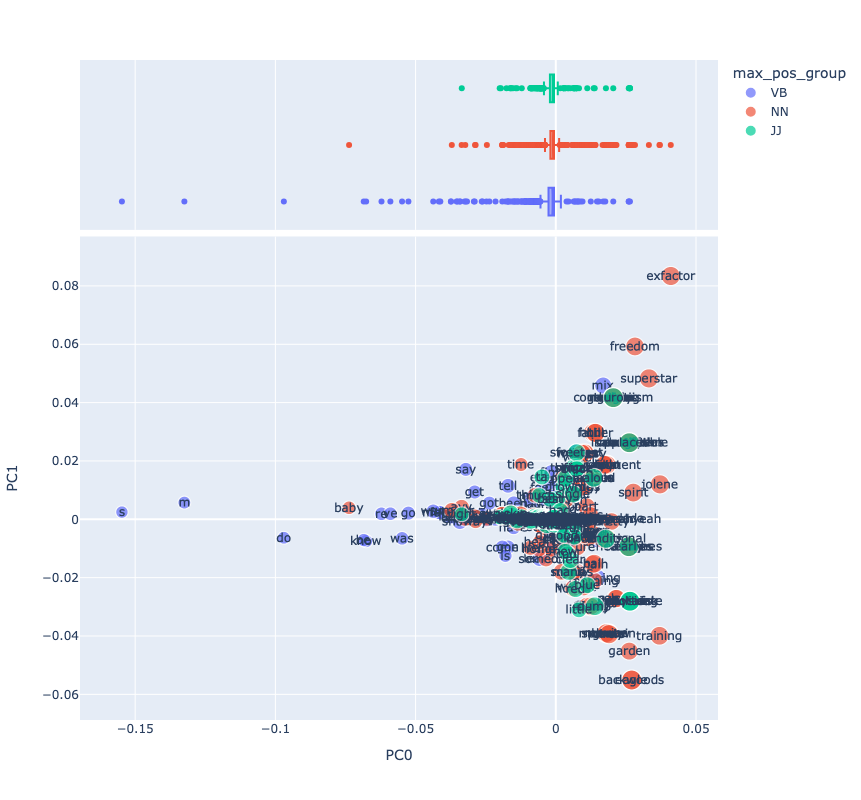

In [107]:
vis_loadings(0,1)

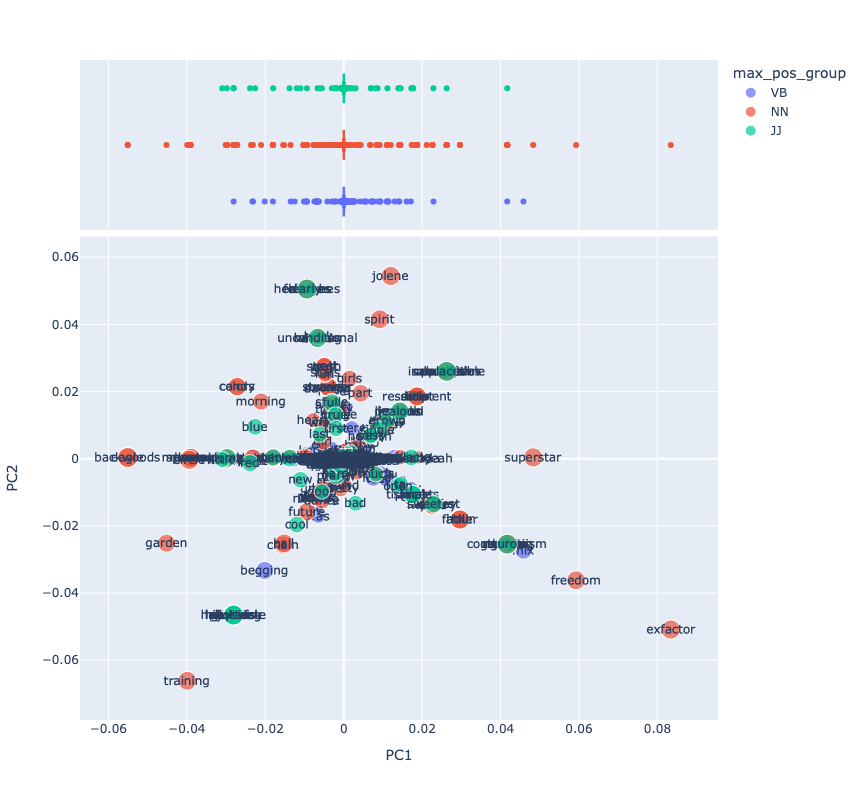

In [108]:
vis_loadings(1,2)

# ---------------------------------------------------------------
# ---------------------------------------------------------------
# ---------------------------------------------------------------

# EXPLORING TOPICS BY DECADES USING Phi and Theta Table

In [195]:
PHI = pd.read_csv('phi.csv').set_index('topic_id')
DOCS = pd.read_csv('docs.csv').set_index(OHCO)
THETA = pd.read_csv('theta.csv').set_index(OHCO)
TOPICS = pd.read_csv('topics.csv').set_index('topic_id')
TOPICS_WITH_LIB = pd.read_csv('topics_with_lib.csv').set_index('topic_id')

In [196]:
LIB = pd.read_csv('lib.csv').set_index('artist')


In [197]:
TOPICS_WITH_LIB

,top_terms,doc_weight_sum,term_freq,mean_document_weight,1970s,1980s,1990s,2000s,2010s,2020s,topic_year_dom
topic_id,,,,,,,,,,,
T00,ayy ayy ayy sheesh sweetener river lea river l...,12.864404,0.032362,0.027966,0.022635,0.022287,0.037310,0.030570,0.031673,0.014531,1990s
T01,love ooh wait wait love wan trust say know goo...,8.926963,0.018203,0.019406,0.027140,0.018241,0.015571,0.014587,0.024852,0.027031,1970s
T02,shake shake shake gon fake tears dry play tear...,10.175505,0.028598,0.022121,0.051914,0.010371,0.015571,0.029693,0.013015,0.014531,1970s
T03,ahooh san west got lost mind waste time waste ...,9.021721,0.009855,0.019612,0.035915,0.034391,0.022817,0.010831,0.012743,0.022865,1970s
T04,ai ava tears ai love love risk risk know got a...,9.923295,0.017390,0.021572,0.027140,0.013200,0.039121,0.013769,0.035614,0.014531,1990s
T05,told say baby told told shit say shit chest sh...,7.714081,0.014679,0.016770,0.013626,0.018030,0.026440,0.007837,0.024081,0.027031,2020s
T06,run run hands hands hair hair hands saving lov...,7.020343,0.006140,0.015262,0.013626,0.014147,0.026440,0.016320,0.009519,0.014531,1990s
T07,look love look look knew say time got know said,15.697957,0.032492,0.034126,0.013626,0.032463,0.033687,0.034459,0.045080,0.031198,2010s
T08,know love tell hear come day know know day com...,15.603362,0.020896,0.033920,0.065428,0.032348,0.026440,0.036423,0.024519,0.027031,1970s


In [198]:
LIB['decade_key'] = LIB.decade_of_prominence.str.split(', ').str[0].str.lower()

In [199]:
from scipy.spatial.distance import pdist
tpairs_idx = [(a, b) for a, b in pd.MultiIndex.from_product([TOPICS.index, TOPICS.index]) if a < b]
TPAIRS = pd.DataFrame(tpairs_idx, columns=['topic_id_x', 'topic_id_y']).set_index(['topic_id_x', 'topic_id_y'])

In [212]:
pca_engine_phi = PCA(7)

In [213]:
PHI_COMPS = pd.DataFrame(pca_engine_phi.fit_transform(normalize(PHI, norm='l2', axis=1)), index=PHI.index)
PHI_COMPS 

,0,1,2,3,4,5,6
topic_id,,,,,,,
T00,-0.223457,0.278414,-0.055611,-0.104342,0.268324,0.228758,0.125991
T01,0.472017,-0.005695,-0.054528,-0.034386,-0.074314,0.104093,0.070369
T02,-0.124198,0.101309,0.257140,-0.215311,0.026136,0.384797,-0.166356
T03,-0.233026,0.240853,-0.005628,-0.025650,0.246220,-0.361242,-0.106180
T04,-0.286163,0.045961,-0.114100,0.058305,0.050003,0.157918,-0.051646
T05,-0.080583,-0.009771,0.044542,0.106407,0.294426,0.227682,0.019359
T06,0.160011,0.463235,0.269259,-0.045881,-0.047263,-0.099088,-0.114362
T07,0.215763,0.009554,-0.134869,0.078426,0.080388,-0.169948,0.093987
T08,0.239833,-0.254087,-0.132791,-0.173904,-0.143874,-0.020823,-0.203368


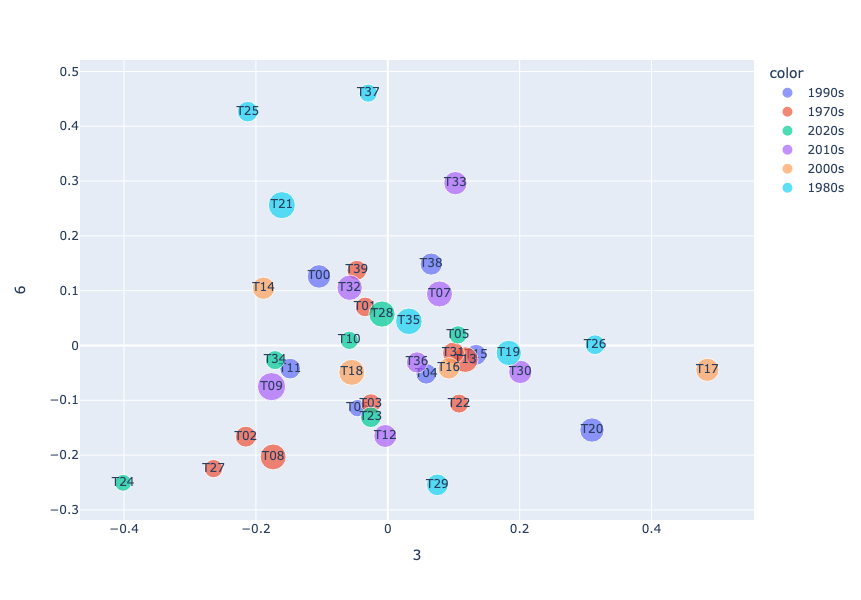

In [219]:
px.scatter(PHI_COMPS.reset_index(), 3, 6, 
           size=TOPICS.mean_document_weight, 
            color = TOPICS_WITH_LIB.topic_year_dom,
           text='topic_id', height=600, width=700)

In [220]:
TOPICS

,top_terms,doc_weight_sum,term_freq,mean_document_weight
topic_id,,,,
T00,ayy ayy ayy sheesh sweetener river lea river l...,12.864404,0.032362,0.027966
T01,love ooh wait wait love wan trust say know goo...,8.926963,0.018203,0.019406
T02,shake shake shake gon fake tears dry play tear...,10.175505,0.028598,0.022121
T03,ahooh san west got lost mind waste time waste ...,9.021721,0.009855,0.019612
T04,ai ava tears ai love love risk risk know got a...,9.923295,0.017390,0.021572
T05,told say baby told told shit say shit chest sh...,7.714081,0.014679,0.016770
T06,run run hands hands hair hair hands saving lov...,7.020343,0.006140,0.015262
T07,look love look look knew say time got know said,15.697957,0.032492,0.034126
T08,know love tell hear come day know know day com...,15.603362,0.020896,0.033920


In [184]:
LIB

,nationality,genre,decade_of_prominence,birth_year,instruments,character_count,decade_key
artist,,,,,,,
ADELE,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']",76812,2010s
AMY WINEHOUSE,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']",52459,2000s
ARIANA GRANDE,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']",89008,2010s
BEYONCE,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']",146783,2000s
CYNDI LAUPER,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669,1980s
DOLLY PARTON,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805,1970s
DUA LIPA,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067,2020s
LAURYN HILL,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']",129809,1990s
PINK,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']",93059,2000s


In [185]:
TOPICS

,top_terms,doc_weight_sum,term_freq,mean_document_weight
topic_id,,,,
T00,ayy ayy ayy sheesh sweetener river lea river l...,12.864404,0.032362,0.027966
T01,love ooh wait wait love wan trust say know goo...,8.926963,0.018203,0.019406
T02,shake shake shake gon fake tears dry play tear...,10.175505,0.028598,0.022121
T03,ahooh san west got lost mind waste time waste ...,9.021721,0.009855,0.019612
T04,ai ava tears ai love love risk risk know got a...,9.923295,0.017390,0.021572
T05,told say baby told told shit say shit chest sh...,7.714081,0.014679,0.016770
T06,run run hands hands hair hair hands saving lov...,7.020343,0.006140,0.015262
T07,look love look look knew say time got know said,15.697957,0.032492,0.034126
T08,know love tell hear come day know know day com...,15.603362,0.020896,0.033920
